# Application of CNNs on MNIST dataset with Tensorflow 2.x.x

## 1. Importing libraries

In [1]:
import random as rd
import numpy as np

from matplotlib import image
from matplotlib import pyplot

import PIL
from PIL import Image
print('Pillow Version:', PIL.__version__)

Pillow Version: 8.0.1


<u><b>Warning:</b></u> This notebook runs on tensorflow version 1.14 (tested using an installation of tensorflow-gpu v1.14.0)

In [2]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tf.enable_v2_behavior()
tf.__version__

'2.4.1'

## 2. Importing datasets
The MNIST datasets are kindly provided by Yann Lecun on his [website](http://yann.lecun.com/exdb/mnist/).

They are directly accessibly through the tensorflow library as seen below.

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

## 3. Data Preprocessing

In [4]:
ds_train

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

<u>1. Building the training pipeline.</u>

In [5]:
def normalize_img(image, label):
  """
  Normalizes images: `uint8` -> `float32`.
  """
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

<u>2. Building the testing pipeline.</u>

In [6]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

## 4. Laying out  and training the model

<u>1. Declaring the model.</u>

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

<u>2. Compiling the model.</u>

In [8]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

<u>3. Fitting the model.</u>

In [9]:
model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 4s 4ms/step - loss: 0.6170 - accuracy: 0.8281 - val_loss: 0.1963 - val_accuracy: 0.9402
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 0.1763 - accuracy: 0.9506 - val_loss: 0.1339 - val_accuracy: 0.9614
Epoch 3/6
469/469 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9657 - val_loss: 0.1120 - val_accuracy: 0.9666
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9748 - val_loss: 0.0980 - val_accuracy: 0.9704
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9791 - val_loss: 0.0855 - val_accuracy: 0.9740
Epoch 6/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9829 - val_loss: 0.0803 - val_accuracy: 0.9750


## 5. Testing the model

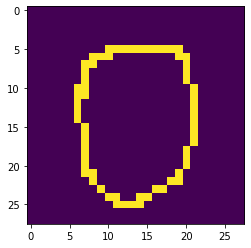

In [10]:
image = np.array(Image.open('test_image.png').convert('L'))

pyplot.imshow(image)
pyplot.show()

In [11]:
X = np.array(image).reshape(-1, image.shape[0], image.shape[1], 1)

In [12]:
model.predict(X)

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5380264e-15,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)